<a href="https://colab.research.google.com/github/krspriya/KNN---Water-Portability/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# For Local Data
df = pd.read_csv("water_potability.csv")

In [3]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


We can see that the columns ph, Sulfate and Trihalomethanes have a few null values. We cannot afford to throw away these datapoints as the dataset contains only 3276 entries. Instead we can either replace them with the mean values of their respective columns.
However we also need to check if there's any change in these parameters with respect to Potability.
 Let's look into that...

In [6]:
null_cols = ['ph','Sulfate','Trihalomethanes']
for col in null_cols:
    print(col,'\n\nImpotable:\n\n',df[df["Potability"]==0][col].describe(),'\n\nPotable:\n\n',df[df["Potability"]==1][col].describe(),end='\n\n')

ph 

Impotable:

 count    1684.000000
mean        7.085378
std         1.683499
min         0.000000
25%         6.037723
50%         7.035456
75%         8.155510
max        14.000000
Name: ph, dtype: float64 

Potable:

 count    1101.000000
mean        7.073783
std         1.448048
min         0.227499
25%         6.179312
50%         7.036752
75%         7.933068
max        13.175402
Name: ph, dtype: float64

Sulfate 

Impotable:

 count    1510.000000
mean      334.564290
std        36.745549
min       203.444521
25%       311.264006
50%       333.389426
75%       356.853897
max       460.107069
Name: Sulfate, dtype: float64 

Potable:

 count    985.000000
mean     332.566990
std       47.692818
min      129.000000
25%      300.763772
50%      331.838167
75%      365.941346
max      481.030642
Name: Sulfate, dtype: float64

Trihalomethanes 

Impotable:

 count    1891.000000
mean       66.303555
std        16.079320
min         0.738000
25%        55.706530
50%        66.542198


For ph and Trihalomethanes the mean is more or less the same irrespective of the potability so for these columns we can opt to replace the NULL values with the mean of the entire column.
However for Sulfate there is a very minor change in mean. We can hence go a bit further in this case and replace values with the means according to their potability.

In [7]:
mask1 = df['Potability']==0
mask2 = df['Potability']==1
for col in null_cols:
    if col!='Sulfate':
        df[col].fillna(df[col].mean(), inplace=True)
    else:
        df.loc[mask1,col] = df.loc[mask1,col].fillna(df.loc[mask1, col].mean())
        df.loc[mask2,col] = df.loc[mask2,col].fillna(df.loc[mask2, col].mean())

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


We have now eliminated all the NULL values from our dataset. Now Lets Implement KNN on the data.

In [8]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,9].values

Test Train Data Split for Supervised Learning.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_Test, Y_train, Y_Test = train_test_split(X,Y, test_size=0.3)

Why Test train Split ?
The train-test split is a common practice used to evaluate the performance of a model, including k-nearest neighbors (KNN). The purpose of the train-test split is to assess how well the model generalizes to unseen data.

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_Test=scaler.transform(X_Test)

The StandardScaler class provided by Scikit Learn applies the standardization on the input (features) variable, making sure they have a mean of approximately 0 and a standard deviation of approximately 1.
It adjusts the data to have a standardized distribution, making it suitable for modeling and ensuring that no single feature disproportionately influences the algorithm due to differences in scale.

KNeighbour Classification for K=3

In [11]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [12]:
Y_pred3 = classifier.predict(X_Test)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_Test,Y_pred3))
print(confusion_matrix(Y_Test,Y_pred3))

              precision    recall  f1-score   support

           0       0.67      0.77      0.72       589
           1       0.56      0.43      0.48       394

    accuracy                           0.63       983
   macro avg       0.61      0.60      0.60       983
weighted avg       0.62      0.63      0.62       983

[[455 134]
 [226 168]]


KNeighbour Classification for K=5

In [14]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,Y_train)
Y_pred5 = classifier.predict(X_Test)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_Test,Y_pred5))
print(confusion_matrix(Y_Test,Y_pred5))

              precision    recall  f1-score   support

           0       0.66      0.81      0.72       589
           1       0.56      0.37      0.44       394

    accuracy                           0.63       983
   macro avg       0.61      0.59      0.58       983
weighted avg       0.62      0.63      0.61       983

[[475 114]
 [250 144]]


KNeighbour Classification for K=7

In [15]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train,Y_train)
Y_pred7 = classifier.predict(X_Test)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_Test,Y_pred7))
print(confusion_matrix(Y_Test,Y_pred7))

              precision    recall  f1-score   support

           0       0.65      0.83      0.73       589
           1       0.57      0.34      0.42       394

    accuracy                           0.63       983
   macro avg       0.61      0.58      0.58       983
weighted avg       0.62      0.63      0.61       983

[[490  99]
 [261 133]]


Now We Will Use Elbow Method for Determining the value of K

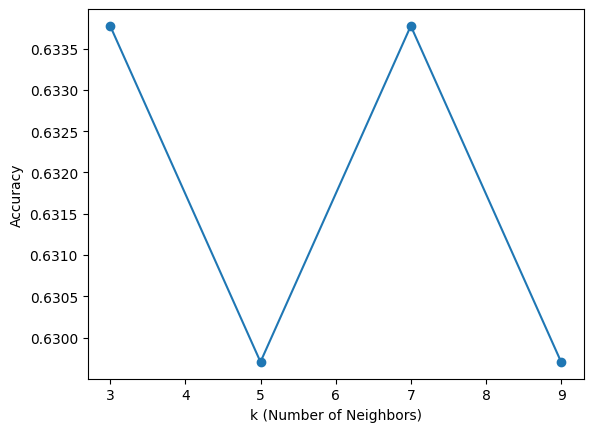

In [16]:
from sklearn.metrics import accuracy_score
k_values = [3, 5, 7, 9]
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_Test)
    accuracy = accuracy_score(Y_Test, y_pred)
    accuracies.append(accuracy)

# Plot the accuracy vs. k
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.show()

Hence , We have Max Accuracy for K=7 , Now we will vary the Distance Metrices.

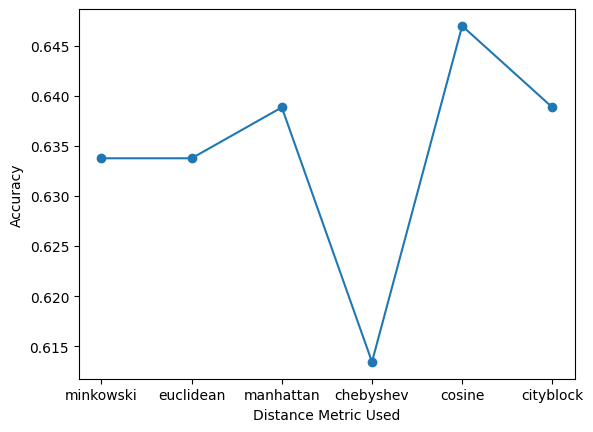

In [17]:
from sklearn.metrics import accuracy_score
distance_metrices = ["minkowski","euclidean","manhattan","chebyshev","cosine","cityblock"]
accuracies = []
for metric_value in distance_metrices:
    knn = KNeighborsClassifier(n_neighbors=7,metric=metric_value)
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_Test)
    accuracy = accuracy_score(Y_Test, y_pred)
    accuracies.append(accuracy)

# Plot the accuracy vs. Distance Metrics
plt.plot(distance_metrices, accuracies, marker='o')
plt.xlabel('Distance Metric Used')
plt.ylabel('Accuracy')
plt.show()